<a href="https://colab.research.google.com/github/jhanwar-shivam/Face-Verification-API/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Price Prediction**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Pre-processing & feature engineering

In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis =1)
y = df['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1216,-120.79,38.24,19.0,1003.0,235.0,538.0,190.0,2.9821,INLAND,90400.0
11875,-117.36,34.00,19.0,4592.0,895.0,2769.0,838.0,3.3622,INLAND,105100.0
10242,-117.87,33.89,25.0,1142.0,162.0,486.0,150.0,7.1472,<1H OCEAN,270100.0
7695,-118.11,33.96,29.0,2784.0,582.0,1278.0,550.0,4.3882,<1H OCEAN,261600.0
13703,-117.23,34.12,18.0,1439.0,319.0,699.0,310.0,2.1071,INLAND,73500.0
...,...,...,...,...,...,...,...,...,...,...
5554,-118.40,33.96,44.0,1138.0,228.0,497.0,228.0,4.1852,<1H OCEAN,303300.0
5379,-118.39,34.03,25.0,3442.0,1050.0,1890.0,914.0,3.0574,<1H OCEAN,319400.0
8698,-118.35,33.87,37.0,1420.0,286.0,886.0,290.0,4.5833,<1H OCEAN,261300.0
16029,-122.44,37.73,46.0,3581.0,758.0,1670.0,703.0,4.1932,NEAR BAY,269200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

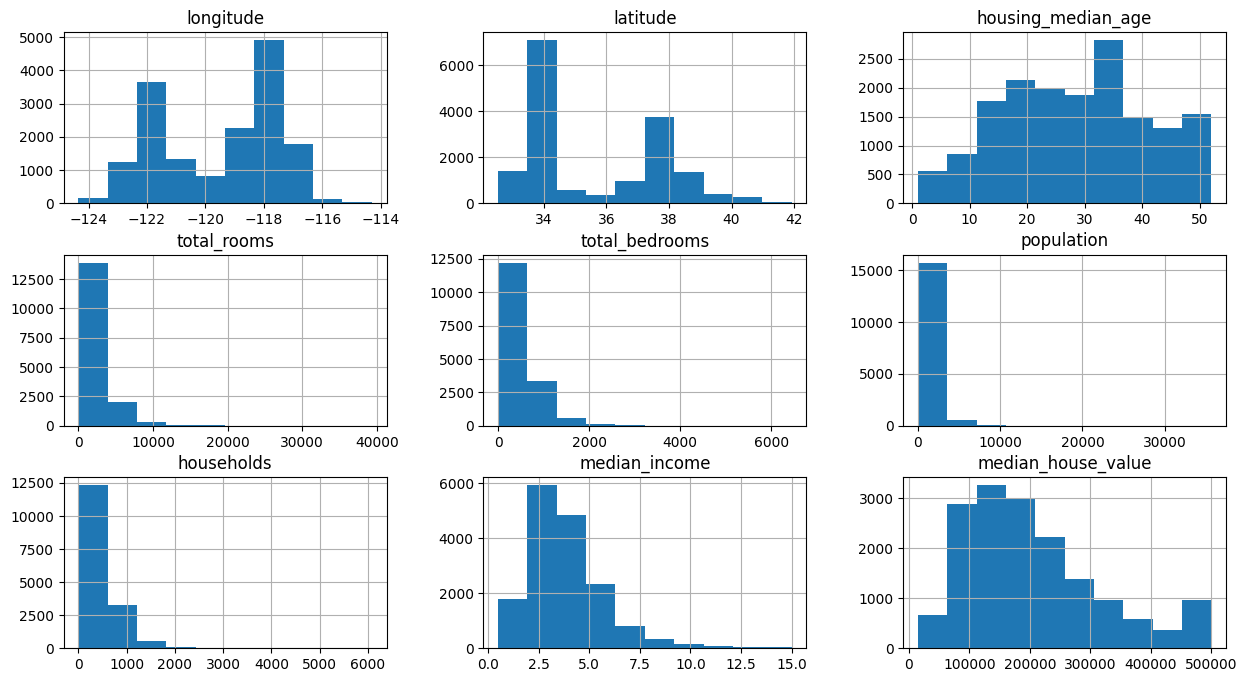

In [11]:
train_data.hist(figsize = (15,8))

<ipython-input-12-4dba2120d0aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

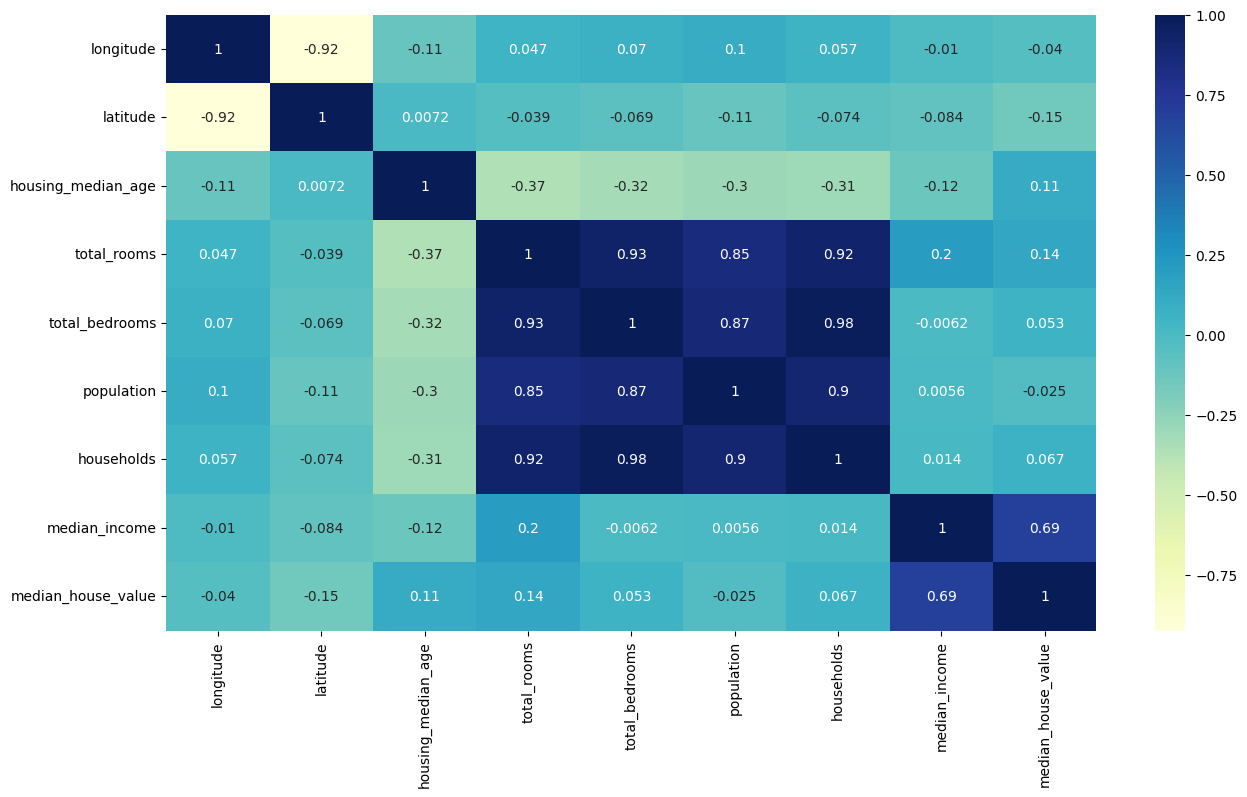

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['households'] = np.log(train_data['households']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

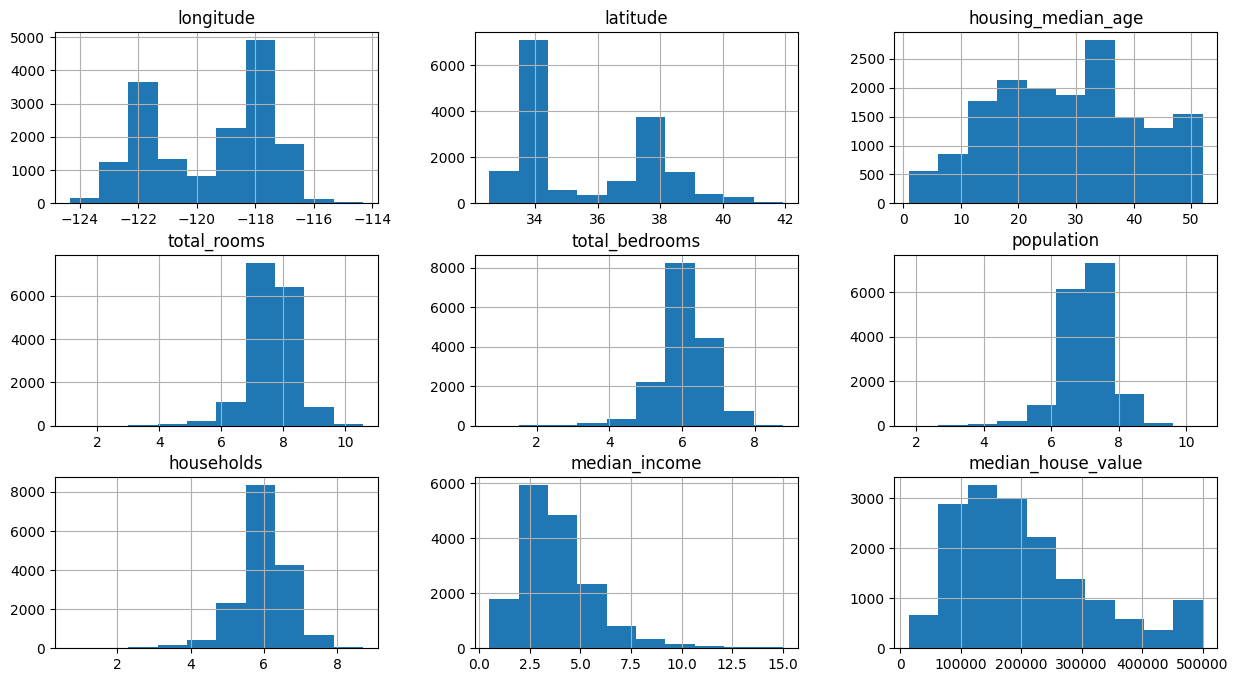

In [14]:
train_data.hist(figsize = (15,8))

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7225
INLAND        5188
NEAR OCEAN    2095
NEAR BAY      1834
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

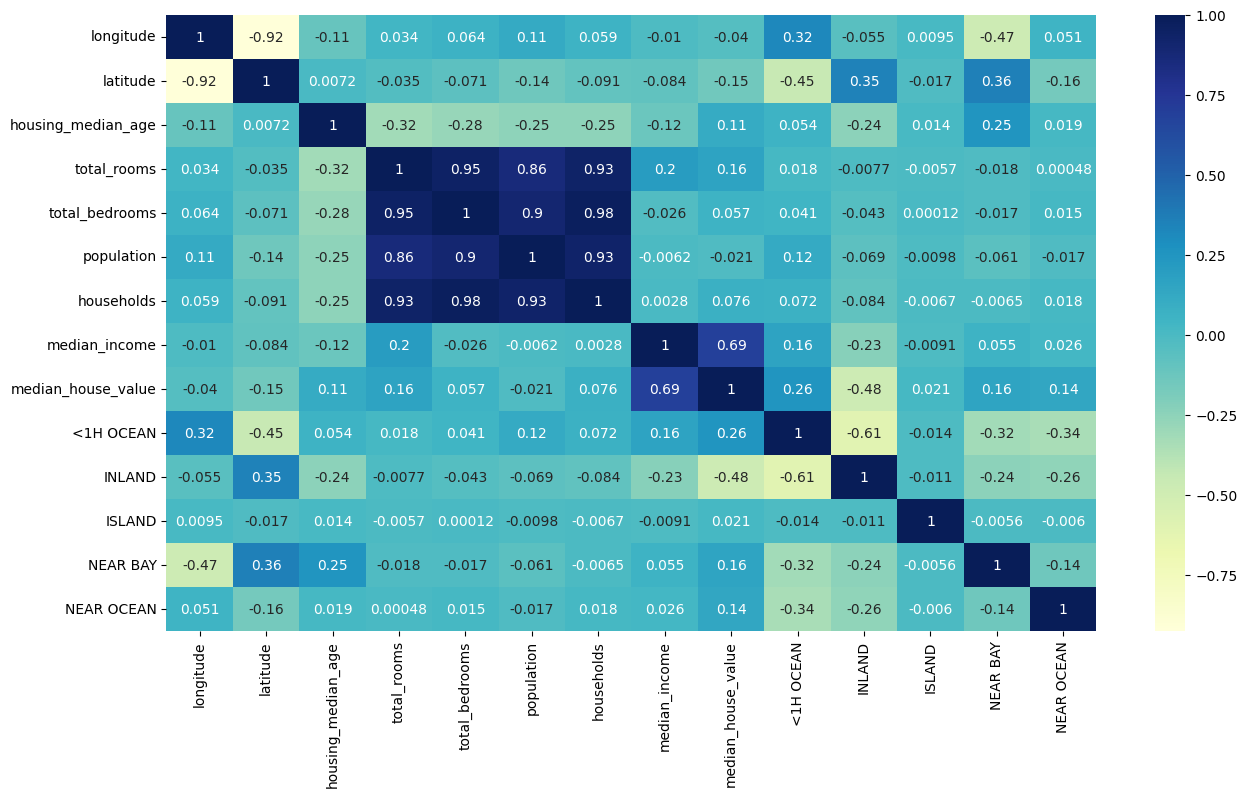

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

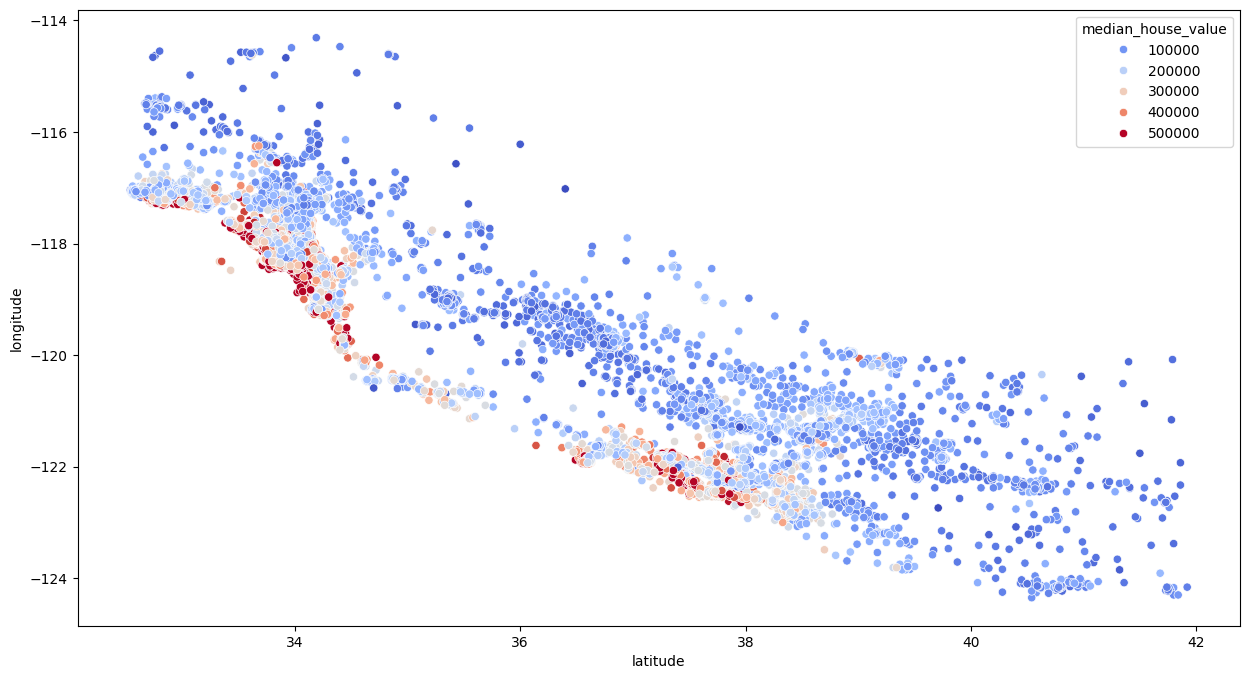

In [18]:
  plt.figure(figsize = (15,8))
  sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

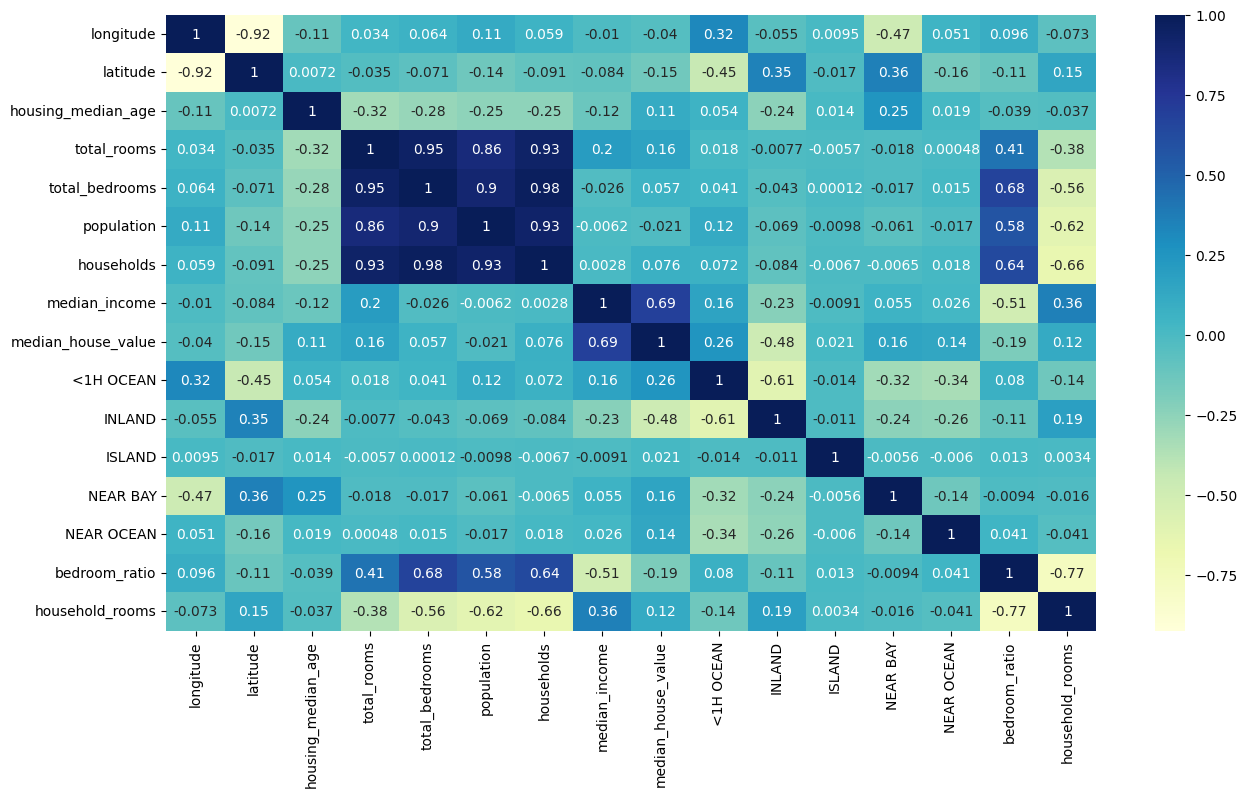

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

##**Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression


X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [24]:
# test_data.insert(11, 'ISLAND', np.zeros(test_data.shape[0]))
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15820,-122.42,37.75,52.0,7.526179,6.416732,7.447751,6.421622,2.1289,250000.0,0,0,0,1,0,0.852588,1.172006
15489,-117.13,33.14,12.0,7.722678,6.124683,7.045777,6.073045,4.0495,153900.0,1,0,0,0,0,0.793078,1.271632
17038,-122.25,37.49,40.0,7.904704,6.257668,7.053586,6.236370,4.6366,395500.0,0,0,0,0,1,0.791638,1.267517
7544,-118.22,33.90,35.0,7.408531,6.052089,7.488294,5.963579,1.4091,105600.0,1,0,0,0,0,0.816908,1.242296
2402,-119.34,36.62,26.0,7.561642,5.828946,7.046647,5.808142,2.6058,92200.0,0,1,0,0,0,0.770857,1.301904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,-117.24,33.21,18.0,7.521318,6.040255,7.366445,5.961005,3.0982,111300.0,1,0,0,0,0,0.803085,1.261753
12438,-116.19,33.67,16.0,7.528332,6.167516,7.598399,6.169611,1.7297,67500.0,0,1,0,0,0,0.819241,1.220228
7062,-118.03,33.93,35.0,7.812378,6.033086,7.234898,6.021023,5.2736,179500.0,1,0,0,0,0,0.772247,1.297517
17828,-121.86,37.40,16.0,7.779885,5.913503,7.258412,5.924256,5.8721,267800.0,1,0,0,0,0,0.760102,1.313226


In [25]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [26]:
reg.score(X_test, y_test)

0.680109406507145

**After Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg_s = LinearRegression()

reg_s.fit(X_train_s, y_train)

LinearRegression()

In [28]:
X_test_s = scaler.fit_transform(X_test)

reg_s.score(X_test_s, y_test)

0.6790440039764308

## **Random Forest**

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

forest.score(X_test, y_test)

0.8173747143069044

## **Parameter Tuning**

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [33]:
best_forest = grid_search.best_estimator_
best_forest.score(X_train, y_train)

0.9696221991738364